In [1]:
import numpy as np

def permintaan_turun(x):
    if x <= 1000:
        return 1
    elif 1000 < x < 3000:
        return (3000 - x) / 2000
    else:
        return 0

def permintaan_tetap(x):
    if 1000 <= x < 3000:
        return (x - 1000) / 2000
    elif 3000 <= x < 5000:
        return (5000 - x) / 2000
    else:
        return 0

def permintaan_naik(x):
    if x <= 3000:
        return 0
    elif 3000 < x < 5000:
        return (x - 3000) / 2000
    else:
        return 1

def persediaan_sedikit(y):
    if y <= 200:
        return 1
    elif 200 < y < 400:
        return (400 - y) / 200
    else:
        return 0

def persediaan_sedang(y):
    if 200 <= y < 400:
        return (y - 200) / 200
    elif 400 <= y < 800:
        return (800 - y) / 400
    else:
        return 0

def persediaan_banyak(y):
    if y <= 600:
        return 0
    elif 600 < y < 800:
        return (y - 600) / 200
    else:
        return 1

def produksi_berkurang(z):
    return z

def produksi_bertambah(z):
    return z

def inferensi_tsukamoto(permintaan, persediaan):
    rules = []

    # Aturan (Rule)
    rules.append(("Bertambah", min(permintaan_turun(permintaan), persediaan_sedikit(persediaan))))
    rules.append(("Berkurang", min(permintaan_turun(permintaan), persediaan_sedang(persediaan))))
    rules.append(("Berkurang", min(permintaan_turun(permintaan), persediaan_banyak(persediaan))))
    rules.append(("Bertambah", min(permintaan_tetap(permintaan), persediaan_sedikit(persediaan))))
    rules.append(("Berkurang", min(permintaan_tetap(permintaan), persediaan_sedang(persediaan))))
    rules.append(("Berkurang", min(permintaan_tetap(permintaan), persediaan_banyak(persediaan))))
    rules.append(("Bertambah", min(permintaan_naik(permintaan), persediaan_sedikit(persediaan))))
    rules.append(("Bertambah", min(permintaan_naik(permintaan), persediaan_sedang(persediaan))))
    rules.append(("Berkurang", min(permintaan_naik(permintaan), persediaan_banyak(persediaan))))

    produksi = []
    for rule in rules:
        if rule[0] == "Berkurang":
            z = 2000  # Nilai z produksi berkurang
        else:
            z = 8000  # Nilai z produksi bertambah
        produksi.append((rule[1], z))
    
    numerator = sum(mu * z for mu, z in produksi)
    denominator = sum(mu for mu, z in produksi)
    return numerator / denominator if denominator != 0 else 0

permintaan_input = 2500  # Masukkan nilai permintaan di sini
persediaan_input = 300   # Masukkan nilai persediaan di sini

output_produksi = inferensi_tsukamoto(permintaan_input, persediaan_input)
print(f"Output produksi: {output_produksi}")


Output produksi: 5000.0


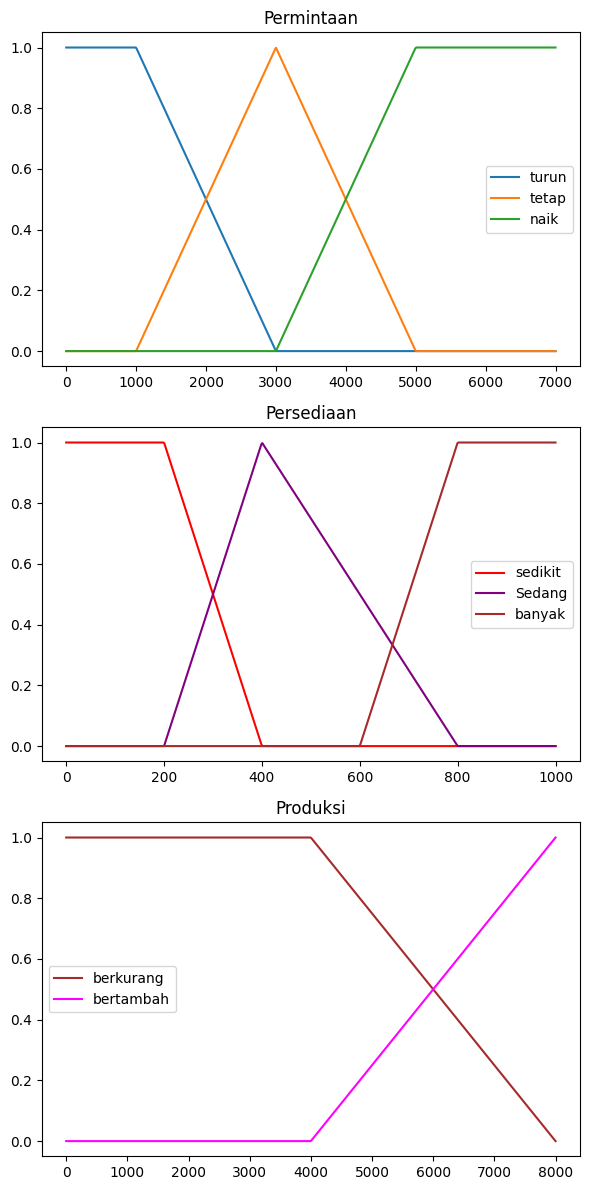

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def permintaan_turun(x):
    return np.where(x <= 1000, 1, np.where(x <= 3000, (3000 - x) / 2000, 0))

def permintaan_tetap(x):
    return np.where(x <= 1000, 0, np.where(x <= 3000, (x - 1000) / 2000, np.where(x <= 5000, (5000 - x) / 2000, 0)))

def permintaan_naik(x):
    return np.where(x <= 3000, 0, np.where(x <= 5000, (x - 3000) / 2000, 1))

def persediaan_sedikit(y):
    return np.where(y <= 200, 1, np.where(y <= 400, (400 - y) / 200, 0))

def persediaan_sedang(y):
    return np.where(y <= 200, 0, np.where(y <= 400, (y - 200) / 200, np.where(y <= 800, (800 - y) / 400, 0)))

def persediaan_banyak(y):
    return np.where(y <= 600, 0, np.where(y <= 800, (y - 600) / 200, 1))

def produksi_berkurang(z):
    return np.where(z <= 4000, 1, np.where(z <= 8000, (8000 - z) / 4000, 0))

def produksi_bertambah(z):
    return np.where(z <= 4000, 0, np.where(z <= 8000, (z - 4000) / 4000, 1))

x = np.linspace(0, 7000, 500)
y = np.linspace(0, 1000, 500)
z = np.linspace(0, 8000, 500)

fig, ax = plt.subplots(3, 1, figsize=(6, 12))

ax[0].plot(x, permintaan_turun(x), label="turun", linestyle='-')
ax[0].plot(x, permintaan_tetap(x), label="tetap", linestyle='-')
ax[0].plot(x, permintaan_naik(x), label="naik", linestyle='-')
ax[0].set_title("Permintaan")
ax[0].legend()

ax[1].plot(y, persediaan_sedikit(y), label="sedikit", linestyle='-', color='red')
ax[1].plot(y, persediaan_sedang(y), label="Sedang", linestyle='-', color='purple')
ax[1].plot(y, persediaan_banyak(y), label="banyak", linestyle='-', color='brown')
ax[1].set_title("Persediaan")
ax[1].legend()

ax[2].plot(z, produksi_berkurang(z), label="berkurang", linestyle='-', color='brown')
ax[2].plot(z, produksi_bertambah(z), label="bertambah", linestyle='-', color='magenta')
ax[2].set_title("Produksi")
ax[2].legend()

plt.tight_layout()
plt.show()
